<a href="https://colab.research.google.com/github/katelyn-hucker/xai_hw5/blob/main/ExplainableDeepLearningReport.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Exaplainable Deep Learning Report
## Katie Hucker (kh509)

All sources are cited at the end of the report, including source code. AI generated code is cited by line when used (see source code).

##Introduction

Occluded objects can impact model classification accuracy depending on the size of the occlusion. Saliency maps are able to provide feature attributions for the classification model. If we occluded images, would saliency maps still highlight the same features prior to occlusion? For this analysis we look at dog classees from the image net dataset, to see if highlighted features of the unoccluded dogs remain important once we occlude them.

## Hypothesis

H0: Saliency maps show no significant difference in patterns between complete dog images and partially occluded dogs.

H1: Saliency maps show higher intensity around visible parts of partially occluded objects compared to the same regions of the unoccluded dog images.


## Experimental Design:

I will use the Inception_V3 model to and the image net dataset to identify whether occlusions on *two* different types of dogs. I chose dogs to demonstrate dog variability differentiation: ear shape, type of fur, head shape, etc. I will provide each dog 2 different occlusion levels: 10%, 20% and 40% occlusion. The saliency maps and occlusion images are displayed in a 2x3 subplot layout. We can compare between occlusion levels, as well as, without occlusion.


## Imports and Google Drive Mount

This section imports required packages, including the source code .py script which includes functions used to generate the saliency maps and images.

In [ ]:
#mount drive
from google.colab import drive
drive.mount('/content/drive', force_remount = True)

Mounted at /content/drive


In [ ]:
%cd /content/drive/My Drive/XAI/xai_hw5
!ls

/content/drive/My Drive/XAI/xai_hw5
ExplainableDeepLearningReport.ipynb  images  __pycache__  source_code_explainableDL.py


In [ ]:
from source_code_explainableDL import create_occlusion, generate_saliency_map, visualize_occlusion_effect

In [ ]:
# Basic
import numpy as np
import matplotlib.pyplot as plt

# Model Utils
import tensorflow as tf
from tensorflow.keras.applications.inception_v3 import InceptionV3, preprocess_input, decode_predictions
from tensorflow.keras.preprocessing import image

# Data Utils
from keras.utils import get_file
import json
import os
from PIL import Image


## Load Model and Image Labels

We load the InceptionV3 model with the imagenet weights. We used image net class labels, we were able to access these labels using code from Dr. Bent's Saliency Map example (source cited previously).

In [ ]:
# load InceptionV3 classification
model = InceptionV3(weights='imagenet')

In [ ]:
# Download the ImageNet class index file
#The imagenet labels code was taken from Dr.Bent's saliency map notebook
class_index_path = get_file('imagenet_class_index.json', 'https://storage.googleapis.com/download.tensorflow.org/data/imagenet_class_index.json')

# Load ImageNet class labels
with open(class_index_path) as f:
    class_idx = json.load(f)

#Path to images
image_path = '/content/drive/My Drive/XAI/xai_hw5/images'

## Standard Schanuzer

The first dog we look to test our hypothesis tests with is the standard schnauzer. The standard schnauzer is a medium sized dog with pointy ears and a grooming style which is unique to the dog (the face shaping). We create the initial saliency map without any occlusions. Following the initial image we create 3 occluded images at 10%, 20%, and 30% occlusion black squares with saliency maps

#### The Unoccluded Schanuzer

In [ ]:
#load standard schnauzer
image_name = 'standard_schnauzer.jpg'
img_path = os.path.join(image_path, image_name)
img = Image.open(img_path)
img = img.resize((299, 299))
img = np.array(img)
img = img.astype(np.float32)

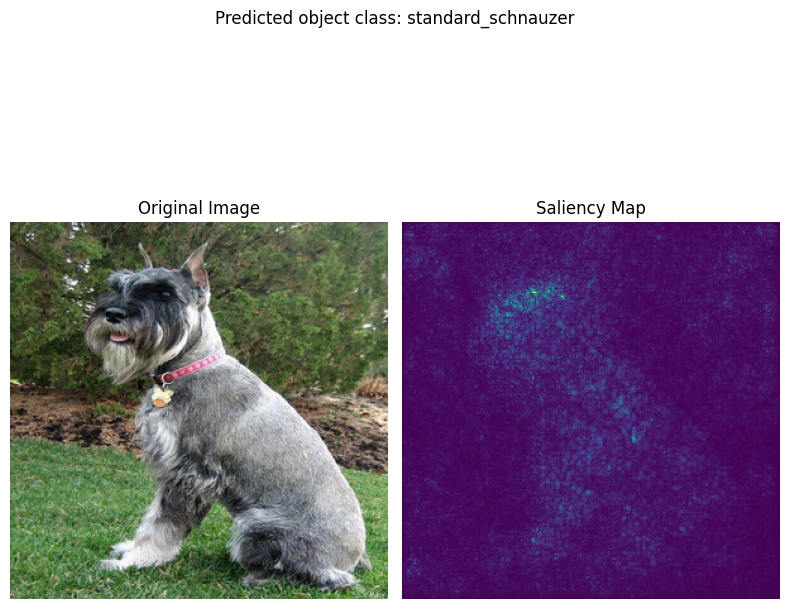

In [ ]:
#This code was taken from Dr.Bent's Saliency Map Notebook

saliency_map, top_pred_index = generate_saliency_map(model,img)
predicted_class = class_idx[str(top_pred_index)][1]

# Display the original image

plt.figure(figsize=(8, 8))

plt.subplot(1, 2, 1)
plt.title('Original Image')
plt.imshow(img.astype(np.uint8))
plt.axis('off')
plt.tight_layout()

# Display the saliency map
plt.subplot(1, 2, 2)
plt.imshow(saliency_map, cmap='viridis')
plt.title("Saliency Map")
plt.suptitle(f"Predicted object class: {predicted_class}")
plt.axis('off')
plt.tight_layout()

plt.show()


##### Discussion

The saliency map shows the shape of the schanuzer. Specifically the eye and ear region of the schanuzer is more brightly colored. This shows that Inception V3 is using the schanuzer head more so than the body to identify the standard schnauzer. Let's see what happens when we add occluded images.

#### The Occluded Schnauzer Images

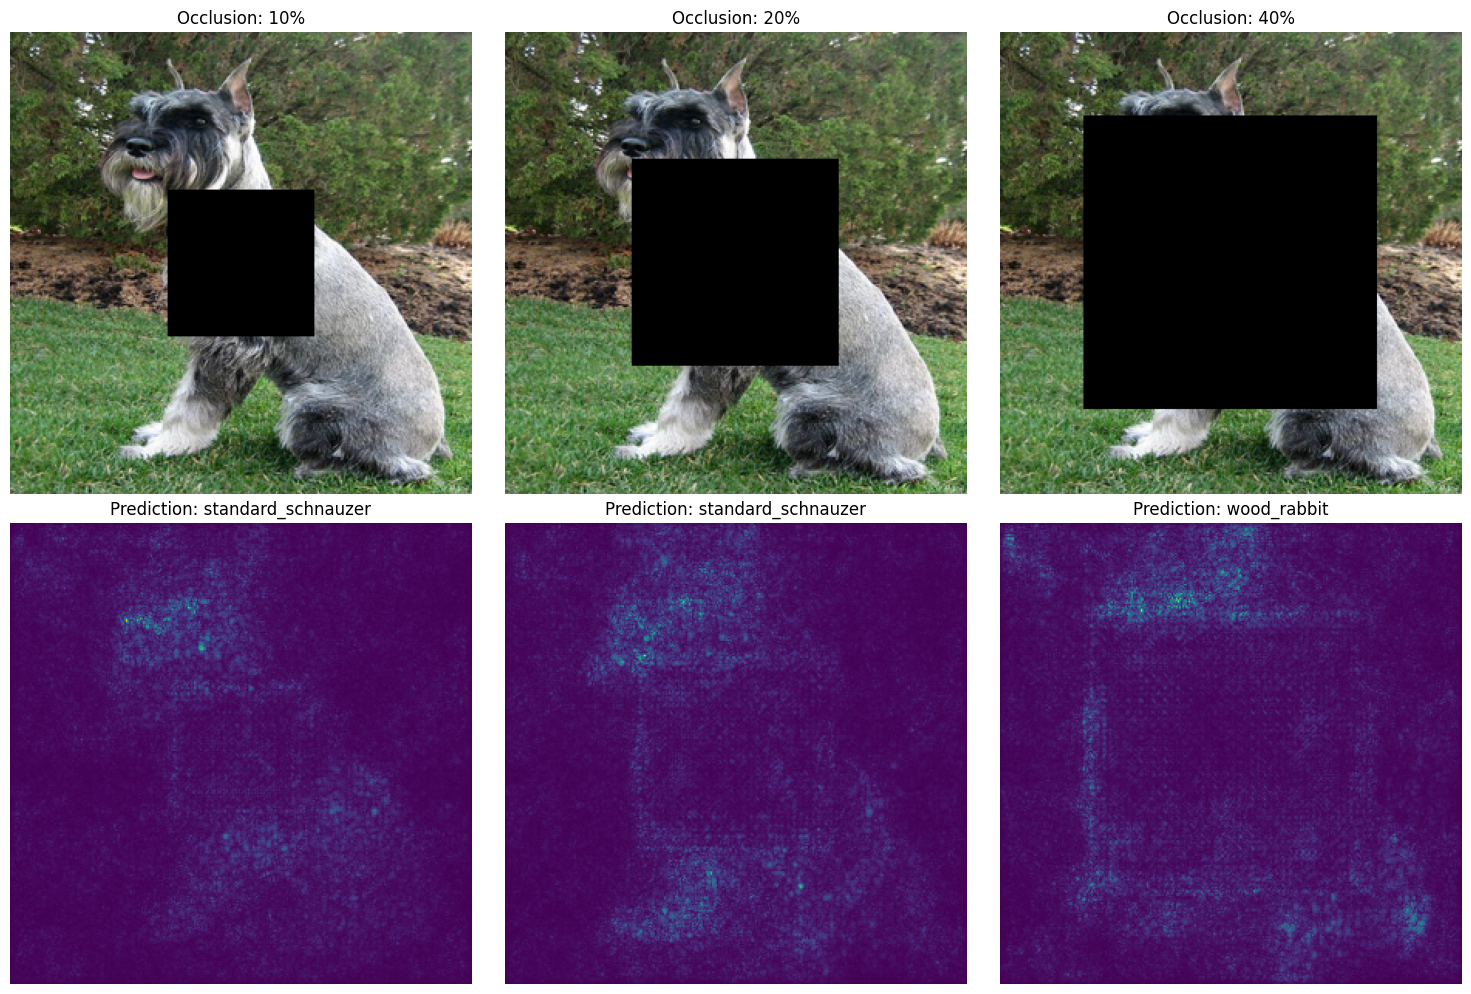

In [ ]:
occlusion_percentages = [10, 20, 40]
visualize_occlusion_effect(img_path, model, occlusion_percentages, create_occlusion, generate_saliency_map, class_idx)

##### Discussion

The prediction remains the same when the occluded objects are 10 and 20% of the images. The saliency map maintains the same regions highlighted which are not covered by the box. Specifically the upper head region is the remains very bright and even gets brighter as we get larger occlusions. The 40% occlusion was unable to predict the standard schanuzer correctly. However, the saliency  map still highlights the ears and upper skull region, as well as the feet. This occlusion did not have the schanuzer's face so the pointy ears may be leading the model to the 'rabbit' prediction.

In [ ]:
image_name = 'golden_retriever.jpg'
img_path = os.path.join(image_path, image_name)
img = Image.open(img_path)
img = img.resize((299, 299))
img = np.array(img)
img = img.astype(np.float32)


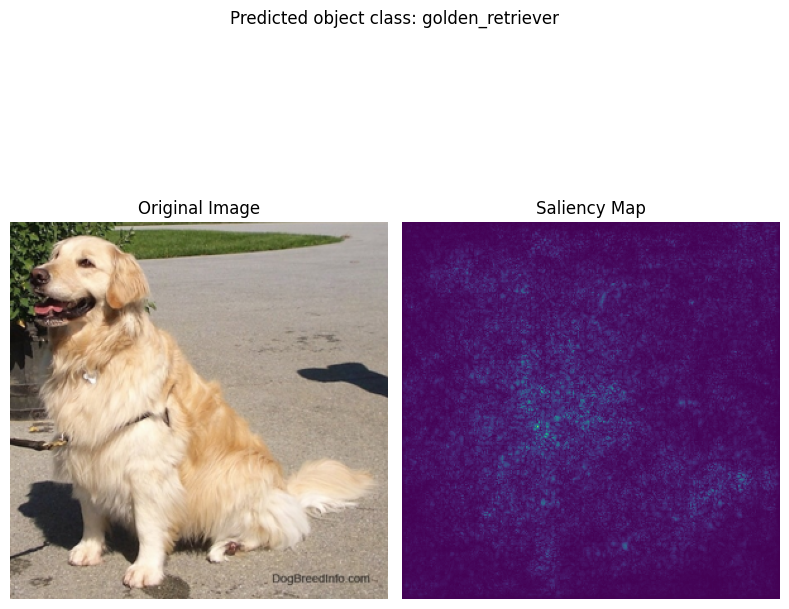

In [ ]:
#This code was taken from Dr.Bent's Saliency Map Notebook
saliency_map, top_pred_index = generate_saliency_map(model,img)
predicted_class = class_idx[str(top_pred_index)][1]
# Display the original image
plt.figure(figsize=(8, 8))

plt.subplot(1, 2, 1)
plt.title('Original Image')
plt.imshow(img.astype(np.uint8))
plt.axis('off')
plt.tight_layout()

# Display the saliency map
plt.subplot(1, 2, 2)
plt.imshow(saliency_map, cmap='viridis')
plt.title("Saliency Map")
plt.suptitle(f"Predicted object class: {predicted_class}")
plt.axis('off')
plt.tight_layout()


##### Discussion

The unoccluded golden retriever image shows a sitting dog similar to the schnauzer. The golden retriever has different ears and a different body chape to the schanuzer. That shows in how the Inception V3 saliency map highlights the chest body region and the feet of the golden retriever.

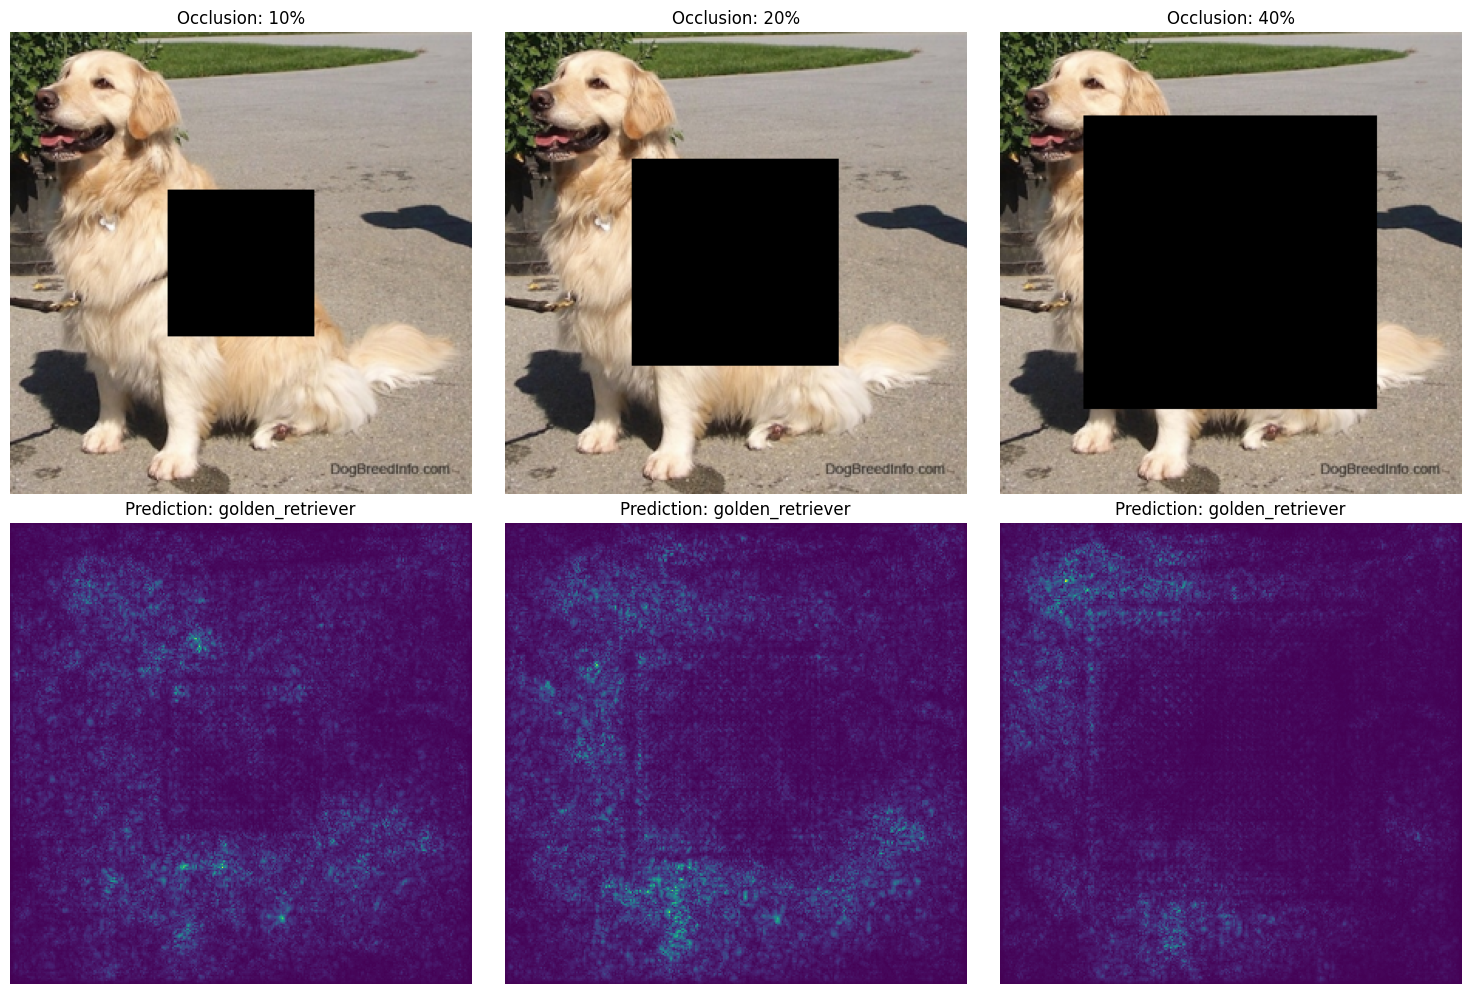

In [ ]:
occlusion_percentages = [10, 20, 40]
visualize_occlusion_effect(img_path, model, occlusion_percentages, create_occlusion, generate_saliency_map, class_idx)

##### Discussion

As we add the occlusions to the golden retriever image, the saliency map begins to focus on the different parts of the dog. This is due to the original saliency map focusing on the chest region. As the black square takes up that space, we see the gradients focus on the feet and face/head region of the retriever. This is interesting because it is still able to predict the golden retriever properly.

## Conclusions



**We can reject our null hypothesis, that is, saliency maps show higher intensity around the dog parts which are unoccluded.**

It is important to note that the saliency map may show intensity on unimportant components of the dog than was originally identified. That is, the occlusion causes the saliency map intensities to change sometimes predicting a different creature as we see with the schnauzer.

It was interesting to see between the dogs, which features are more important, like the ears and face shape of the schnauzer was crucial for prediction. However, the golden retriever's prediction varied and was less reliant on specific features.

This analaysis would benefit from more dog scenarios, as well as moving the occlusion around the image rather than just center the occlusion.

## References

Source code for the functions can be found here: https://drive.google.com/file/d/1ZbU2jDazyViCIoF_atI6P60J_IiTxScW/view?usp=sharing

#### Coding/Modeling sources
https://deeplearning.cms.waikato.ac.nz/user-guide/class-maps/IMAGENET/

https://github.com/AIPI-590-XAI/Duke-AI-XAI/blob/main/explainable-ml-example-notebooks/saliency_maps.ipynb

https://nnabla.readthedocs.io/en/latest/python/api/models/imagenet.html

#### Image sources
https://www.dogbreedinfo.com/goldenretriever.htm

https://www.pinterest.com/pin/208010076512497772/
